Data Preprocessing

In [30]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
#Importing Packages
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt





Uploading the Dataset

In [32]:
urls=['https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1975_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1979_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1983_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1987_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1992_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1996_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/1999_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/2003_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/2007_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/2011_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/2015_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/2019_Match_Stats.csv',
      'https://raw.githubusercontent.com/ashanjayamal/PyDataProject/refs/heads/main/2023_Match_Stats.csv'
      ]
#csv_files=[pd.read_csv(url) for url in urls]
#csv_files
crick_df = pd.concat([pd.read_csv(url) for url in urls], ignore_index=True)

crick_df.head()

,Unnamed: 0.1,Unnamed: 0,date,venue,match_category,team_1,team_2,team_1_runs,team_1_wickets,team_2_runs,team_2_wickets,result,pom,best_batters,best_bowlers,commentary_line,world_cup_year,host_country
0,0,11,NaN,Nottingham,League-Match,PAK,SL,330.0,6.0,138.0,0.0,Pakistan won by 192 runs,Zaheer Abbas,NaN,NaN,NaN,1975,England
1,1,5,NaN,Leeds,League-Match,EAf,IND,120.0,0.0,123.0,0.0,India won by 10 wickets (with 181 balls remain...,Farokh Engineer,NaN,NaN,NaN,1975,England
2,2,12,1975-06-18,Leeds,Semi-Final,ENG,AUS,93.0,0.0,94.0,6.0,Australia won by 4 wickets (with 188 balls rem...,Gary Gilmour,NaN,NaN,NaN,1975,England
3,3,8,1975-06-14,Birmingham,League-Match,ENG,EAf,290.0,5.0,94.0,0.0,England won by 196 runs,John Snow,NaN,NaN,NaN,1975,England
4,4,13,NaN,The Oval,Semi-Final,NZ,WI,158.0,0.0,159.0,5.0,West Indies won by 5 wickets (with 119 balls r...,Alvin Kallicharran,NaN,NaN,NaN,1975,England


Examining the DataFrame

In [33]:
crick_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0.1     528 non-null    int64  
 1   Unnamed: 0       528 non-null    int64  
 2   date             364 non-null    object 
 3   venue            528 non-null    object 
 4   match_category   528 non-null    object 
 5   team_1           528 non-null    object 
 6   team_2           528 non-null    object 
 7   team_1_runs      518 non-null    float64
 8   team_1_wickets   518 non-null    float64
 9   team_2_runs      513 non-null    float64
 10  team_2_wickets   513 non-null    float64
 11  result           528 non-null    object 
 12  pom              510 non-null    object 
 13  best_batters     250 non-null    object 
 14  best_bowlers     250 non-null    object 
 15  commentary_line  83 non-null     object 
 16  world_cup_year   528 non-null    int64  
 17  host_country    

In [34]:
crick_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'date', 'venue', 'match_category',
       'team_1', 'team_2', 'team_1_runs', 'team_1_wickets', 'team_2_runs',
       'team_2_wickets', 'result', 'pom', 'best_batters', 'best_bowlers',
       'commentary_line', 'world_cup_year', 'host_country'],
      dtype='object')

In [35]:
print(crick_df.shape)

(528, 18)


In [36]:
crick_df.describe()

,Unnamed: 0.1,Unnamed: 0,team_1_runs,team_1_wickets,team_2_runs,team_2_wickets,world_cup_year
count,528.000000,528.000000,518.000000,518.000000,513.000000,513.000000,528.000000
mean,21.871212,21.034091,243.239382,4.590734,198.643275,2.777778,2003.373106
std,14.307231,13.915398,75.108565,3.465005,59.732864,3.044163,13.352007
min,0.000000,0.000000,1.000000,0.000000,24.000000,0.000000,1975.000000
25%,10.000000,9.000000,197.000000,0.000000,158.000000,0.000000,1992.000000
50%,20.000000,20.000000,244.000000,6.000000,204.000000,2.000000,2003.000000
75%,33.000000,32.000000,292.000000,8.000000,235.000000,5.000000,2015.000000
max,55.000000,53.000000,428.000000,9.000000,383.000000,9.000000,2023.000000


Data Cleaning

In [37]:

# Removing duplicate rows from the DataFrame
crick_df = crick_df.drop_duplicates()

# Resetting the index after removing duplicates
crick_df.reset_index(drop=True, inplace=True)

# Checking the shape of the DataFrame after removing duplicates
print(f"DataFrame shape after removing duplicates: {crick_df.shape}")

DataFrame shape after removing duplicates: (528, 18)


Removing Unnecessary Columns

Since the columns named 'Unnamed: 0.1','Unnamed: 0' don't have any specific meaning, we removed those columns.
Since the columns named 'commentary_line','date' aren't relevent for the data analysis, we removed those columns.

In [38]:
# Removing unnessary colummuns
crick_df = crick_df.drop(columns=['date','Unnamed: 0.1','Unnamed: 0','commentary_line'])


In [39]:
# checking null values
print(crick_df.isnull().sum())

venue               0
match_category      0
team_1              0
team_2              0
team_1_runs        10
team_1_wickets     10
team_2_runs        15
team_2_wickets     15
result              0
pom                18
best_batters      278
best_bowlers      278
world_cup_year      0
host_country        0
dtype: int64


In [40]:
print(crick_df.shape)

(528, 14)


Checking for outliers

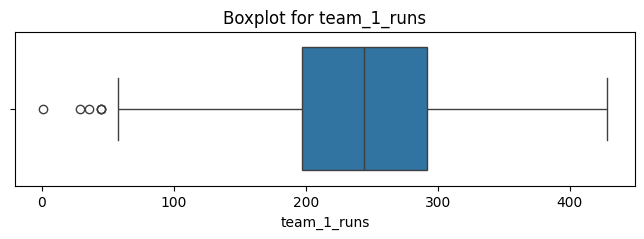

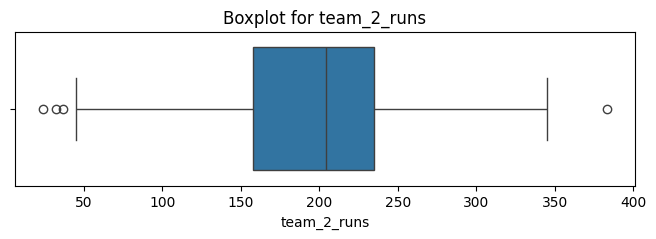

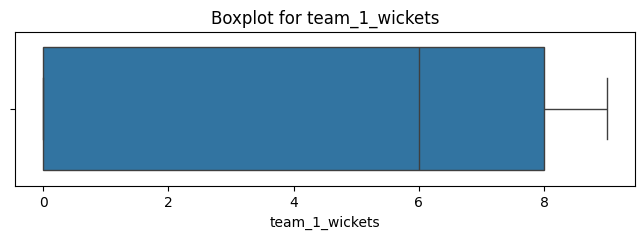

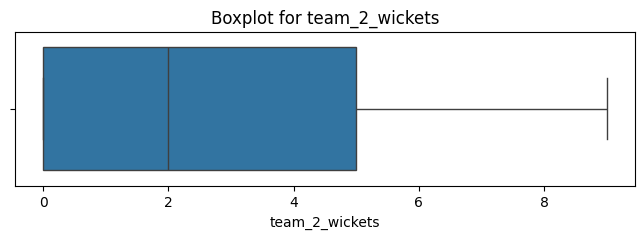

In [41]:


# Identify numerical columns
numerical_cols = ['team_1_runs', 'team_2_runs', 'team_1_wickets', 'team_2_wickets']

# Plot boxplots to visualize potential outliers
for col in numerical_cols:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=crick_df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

Checking for the rows with extreme values

Since the highest and lowest values of this dataset has a specific meaning according to the real scenario, we are going to check for extremely unrealistic values instead of following the normal ways like below.
1. considering the IQR
2. using the Boxplot

In [42]:
# Filter rows where team_1_runs > 400
high_scoring_matches_1 = crick_df[crick_df['team_1_runs'] > 400]

# Display the filtered rows
print(high_scoring_matches_1)

              venue match_category team_1 team_2  team_1_runs  team_1_wickets  \
323   Port of Spain   League-Match    IND    BER        413.0             5.0   
387           Perth   League-Match    AUS    AFG        417.0             6.0   
406          Sydney   League-Match     SA     WI        408.0             5.0   
414        Canberra   League-Match     SA    IRE        411.0             4.0   
479       Bengaluru   League-Match     NZ    PAK        401.0             6.0   
507           Delhi   League-Match     SA     SL        428.0             5.0   
526       Bengaluru   League-Match    IND    NED        410.0             4.0   

     team_2_runs  team_2_wickets                                result  \
323        156.0             0.0                 India won by 257 runs   
387        142.0             0.0             Australia won by 275 runs   
406        151.0             0.0          South Africa won by 257 runs   
414        210.0             0.0          South Africa 

Since these values are not extreme according to the reality, we are not going to remove these.

In [43]:
crick_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   venue           528 non-null    object 
 1   match_category  528 non-null    object 
 2   team_1          528 non-null    object 
 3   team_2          528 non-null    object 
 4   team_1_runs     518 non-null    float64
 5   team_1_wickets  518 non-null    float64
 6   team_2_runs     513 non-null    float64
 7   team_2_wickets  513 non-null    float64
 8   result          528 non-null    object 
 9   pom             510 non-null    object 
 10  best_batters    250 non-null    object 
 11  best_bowlers    250 non-null    object 
 12  world_cup_year  528 non-null    int64  
 13  host_country    528 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 57.9+ KB


In [44]:
# Filter rows where team_1_runs < 50
low_scoring_matches_1 = crick_df[crick_df['team_1_runs'] < 50]

# Display the filtered rows
print(low_scoring_matches_1)

            venue match_category team_1 team_2  team_1_runs  team_1_wickets  \
17     Manchester   League-Match    CAN    ENG         45.0             0.0   
24     Manchester   League-Match    CAN    ENG         45.0             0.0   
98         Mackay   League-Match    IND     SL          1.0             0.0   
144         Patna   League-Match    ZIM  KENYA         45.0             3.0   
271         Paarl   League-Match    CAN     SL         36.0             0.0   
474   Southampton   League-Match     SA     WI         29.0             2.0   

     team_2_runs  team_2_wickets  \
17          46.0             2.0   
24          46.0             2.0   
98           NaN             NaN   
144          NaN             NaN   
271         37.0             1.0   
474          NaN             NaN   

                                                result               pom  \
17   England won by 8 wickets (with 277 balls remai...         Chris Old   
24   England won by 8 wickets (with 277 b

In [45]:
# Filter rows where team_2_runs > 400
high_scoring_matches_2 = crick_df[crick_df['team_2_runs'] > 400]

# Display the filtered rows
print(high_scoring_matches_2)

Empty DataFrame
Columns: [venue, match_category, team_1, team_2, team_1_runs, team_1_wickets, team_2_runs, team_2_wickets, result, pom, best_batters, best_bowlers, world_cup_year, host_country]
Index: []


In [46]:
# Filter rows where team_2_runs < 50
low_scoring_matches_2 = crick_df[crick_df['team_2_runs'] < 50]

# Display the filtered rows
print(low_scoring_matches_2)

              venue match_category team_1 team_2  team_1_runs  team_1_wickets  \
17       Manchester   League-Match    CAN    ENG         45.0             0.0   
24       Manchester   League-Match    CAN    ENG         45.0             0.0   
119        Adelaide   League-Match    PAK    ENG         74.0             0.0   
230   Potchefstroom   League-Match    AUS    NAM        301.0             6.0   
237          Benoni   League-Match     WI    BAN        244.0             9.0   
271           Paarl   League-Match    CAN     SL         36.0             0.0   

     team_2_runs  team_2_wickets  \
17          46.0             2.0   
24          46.0             2.0   
119         24.0             1.0   
230         45.0             0.0   
237         32.0             2.0   
271         37.0             1.0   

                                                result               pom  \
17   England won by 8 wickets (with 277 balls remai...         Chris Old   
24   England won by 8 wicke

Since these values are not extreme according to the reality, we are not going to remove these.

Normally the minimum wicket count is 0 and the maximum wicket count is 10. Therefore we are going to check for extremes using these values.


In [47]:
# Filter rows where team_1_wickets > 10
high_wicket_matches_1 = crick_df[crick_df['team_1_wickets'] > 10]

# Display the filtered rows
print(high_wicket_matches_1)

Empty DataFrame
Columns: [venue, match_category, team_1, team_2, team_1_runs, team_1_wickets, team_2_runs, team_2_wickets, result, pom, best_batters, best_bowlers, world_cup_year, host_country]
Index: []


In [48]:
# Filter rows where team_1_wickets <1
low_wicket_matches_1 = crick_df[crick_df['team_1_wickets'] > 10]

# Display the filtered rows
print(low_wicket_matches_1)

Empty DataFrame
Columns: [venue, match_category, team_1, team_2, team_1_runs, team_1_wickets, team_2_runs, team_2_wickets, result, pom, best_batters, best_bowlers, world_cup_year, host_country]
Index: []


In [49]:
# Filter rows where team_2_wickets > 10
high_wicket_matches_2 = crick_df[crick_df['team_2_wickets'] > 10]

# Display the filtered rows
print(high_wicket_matches_2)

Empty DataFrame
Columns: [venue, match_category, team_1, team_2, team_1_runs, team_1_wickets, team_2_runs, team_2_wickets, result, pom, best_batters, best_bowlers, world_cup_year, host_country]
Index: []


In [50]:
# Filter rows where team_2_wickets <1
low_wicket_matches_2 = crick_df[crick_df['team_2_wickets'] > 10]

# Display the filtered rows
print(low_wicket_matches_2)

Empty DataFrame
Columns: [venue, match_category, team_1, team_2, team_1_runs, team_1_wickets, team_2_runs, team_2_wickets, result, pom, best_batters, best_bowlers, world_cup_year, host_country]
Index: []


There are no extreme values for the wicket counts.